In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Specify the file path
file_path = r'D:\archive\listings.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())
print(df.tail())


        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [26]:
#checking data structure
print(df.shape)
print(df.columns)
print(df.dtypes)
#Display basic information about the dataset
print(df.info())

(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

                 id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  

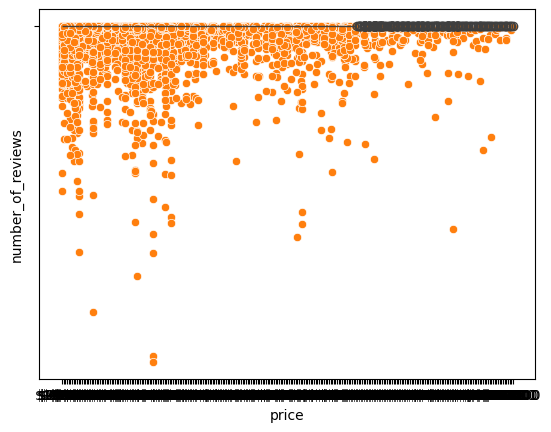

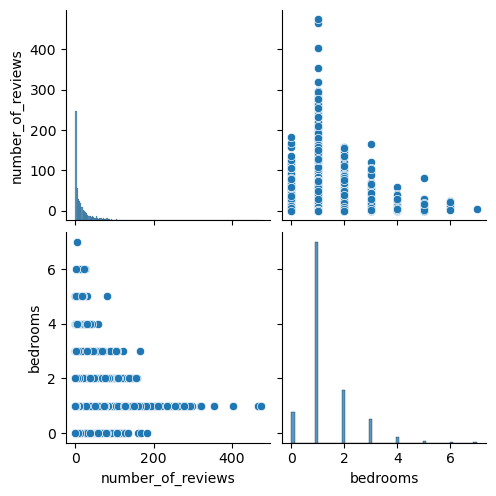

In [28]:
# Get summary statistics
print(df.describe())
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

sns.boxplot(x=df['price'])
sns.scatterplot(x='price', y='number_of_reviews', data=df)
sns.pairplot(df[['price', 'number_of_reviews', 'bedrooms']])


In [30]:
# Correct the regular expression using a raw string
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the average price
average_price = df['price'].mean()
print(f"The average price of listings is: ${average_price:.2f}")

# Calculate the distribution of property types
property_type_distribution = df['property_type'].value_counts()



The average price of listings is: $127.98


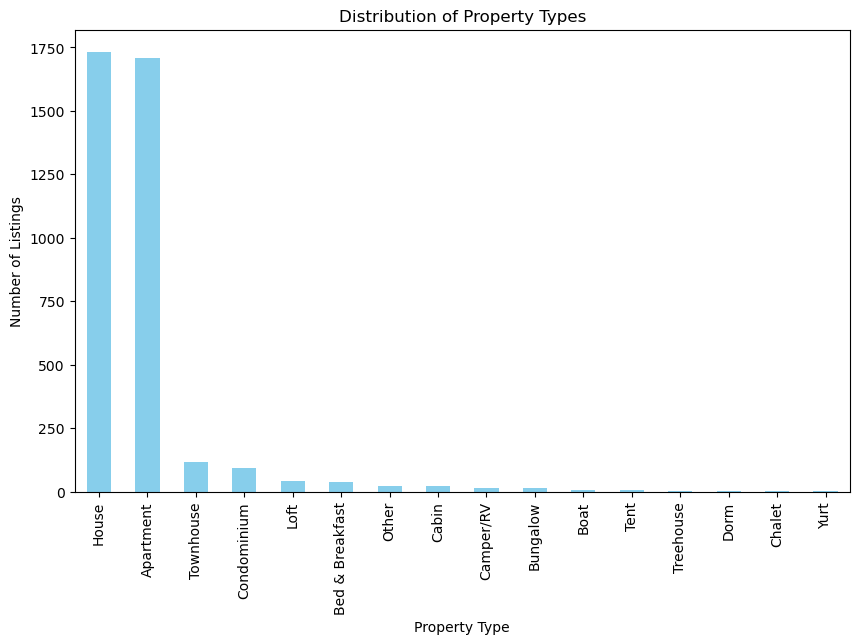

In [32]:
# Visualize the distribution with a bar plot
plt.figure(figsize=(10, 6))
property_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.show()


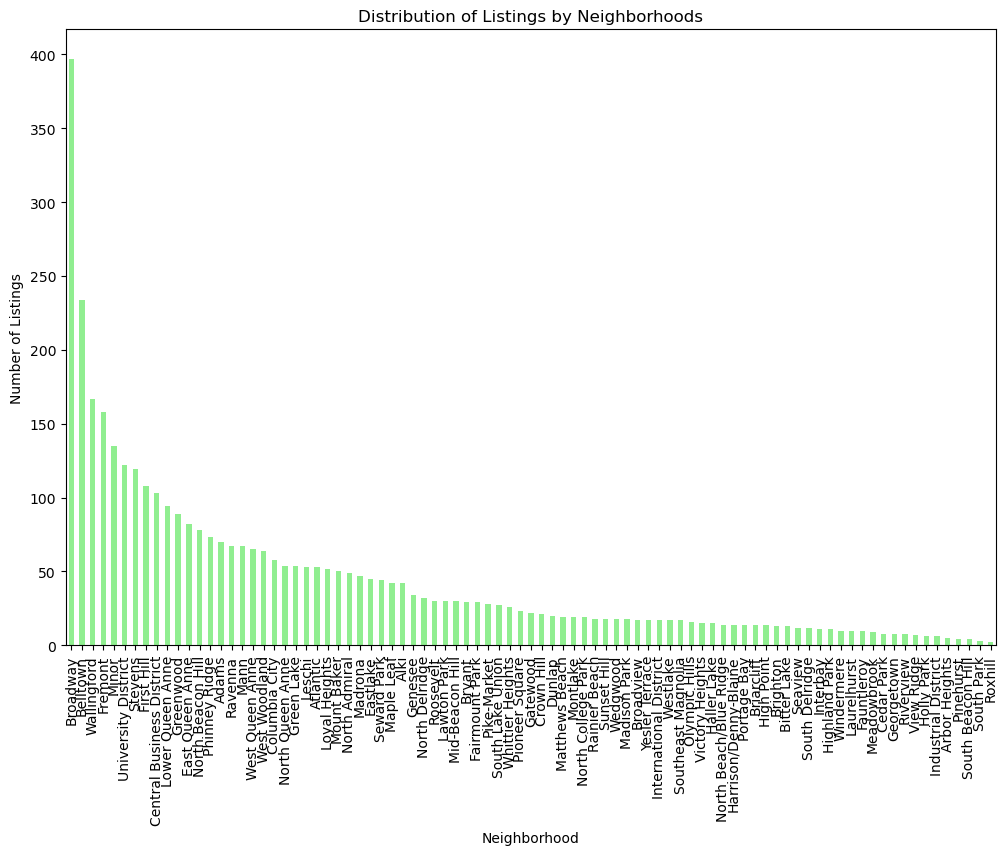

In [34]:
# Calculate the distribution of listings by neighborhood
neighborhood_distribution = df['neighbourhood_cleansed'].value_counts()

# Visualize the distribution with a bar plot
plt.figure(figsize=(12, 8))
neighborhood_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Listings by Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.show()




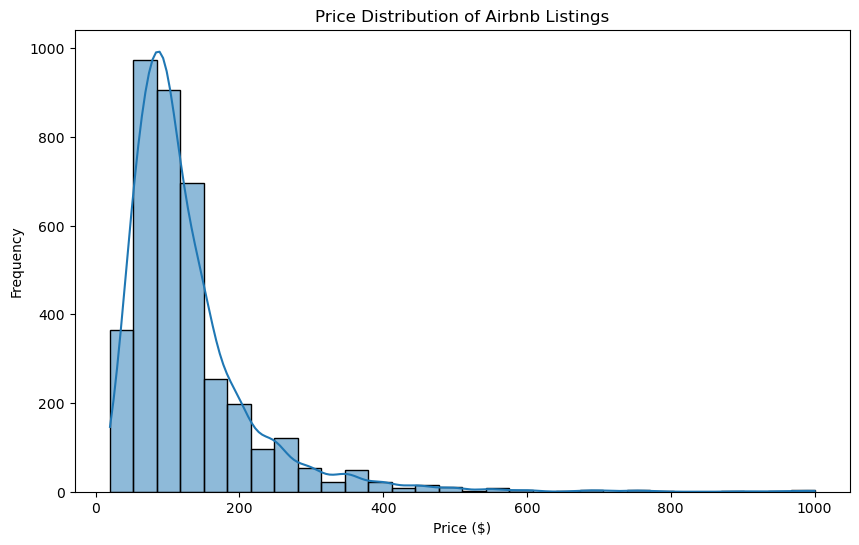

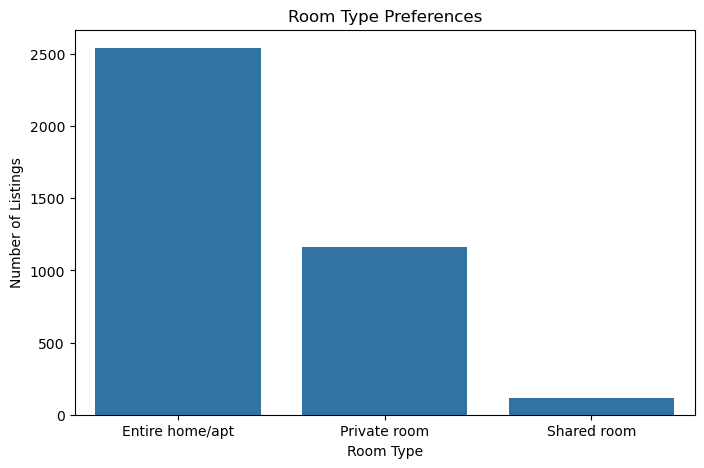

In [44]:
# Plot the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()




# Plot the distribution of room types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()





review_month
1.0      230
2.0        7
3.0       18
4.0       16
5.0       26
6.0       52
7.0       66
8.0      264
9.0      392
10.0     384
11.0     512
12.0    1224
dtype: int64


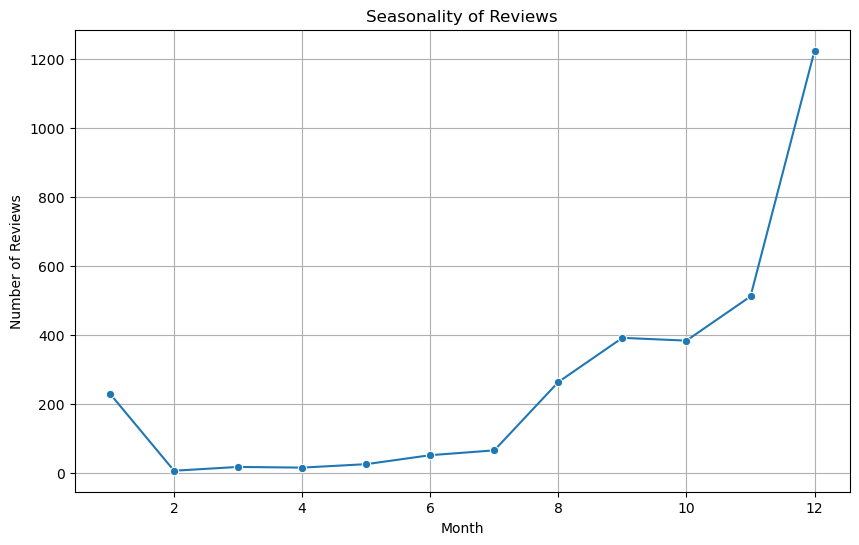

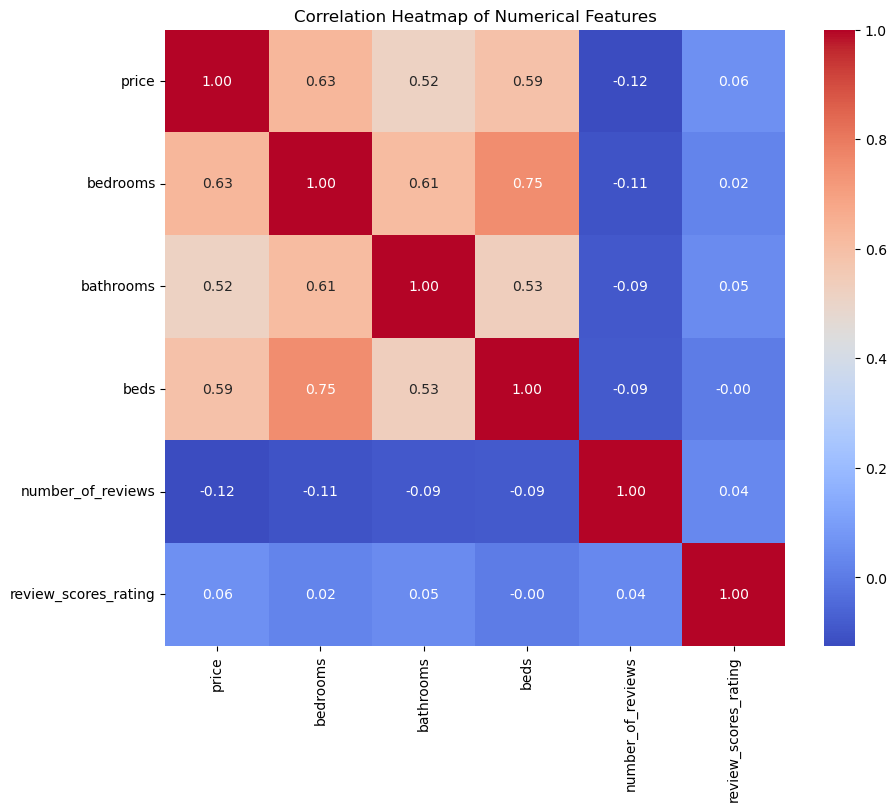

In [42]:

# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Extract the month from the review date
df['review_month'] = df['last_review'].dt.month

# Group by month and calculate the number of reviews per month
reviews_by_month = df.groupby('review_month').size()

# Display the result
print(reviews_by_month)

# Plot the seasonality
plt.figure(figsize=(10, 6))
sns.lineplot(x=reviews_by_month.index, y=reviews_by_month.values, marker='o')
plt.title('Seasonality of Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()





# Select relevant numerical features
numeric_features = df[['price', 'bedrooms', 'bathrooms', 'beds', 'number_of_reviews', 'review_scores_rating']]
# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Numerical Features')
plt.show()